<a href="https://colab.research.google.com/github/raskapati/Assignment1-Gaussian-Mixture-Model/blob/main/Jawaban_Latihan_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LATIHAN 2 - GMM dan GMM-EM**
## **Anggota Kelompok :**
### 1) Muhamad Ido Raskapati (1906354154)
### 2) Annisa Zahra (2006463295)
### 3) Jeremi Okto Ricardo Marpaung (2006568733)
### 4) Aulia Shinta Madani (2106724984)

# K-Means

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

iris=pd.read_csv('/content/Iris.csv')
print(iris)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

## K-Means: Petal Length vs Petal Width

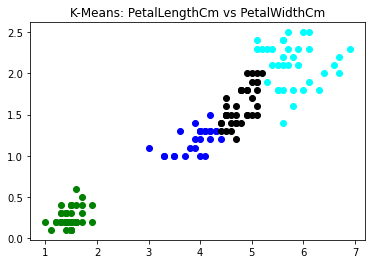

In [2]:
data_petal=iris[['PetalLengthCm','PetalWidthCm']]

#training k-means model
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(data_petal)

#prediction from kmeans
pred=kmeans.predict(data_petal)
frame=pd.DataFrame(data_petal)
frame['cluster']=pred
frame.columns=['PetalLengthCm','PetalWidthCm','cluster']

#plotting results
color=['blue','green','cyan','black']
for k in range(0,4):
    data=frame[frame['cluster']==k]
    plt.scatter(data["PetalLengthCm"],data['PetalWidthCm'],c=color[k])
plt.title("K-Means: PetalLengthCm vs PetalWidthCm")
plt.show()

## K-Means: Sepal Length vs Sepal Width

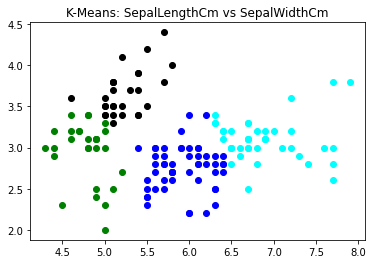

In [3]:
data_sepal=iris[['SepalLengthCm','SepalWidthCm']]

#training k-means model
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(data_sepal)

#prediction from kmeans
pred=kmeans.predict(data_sepal)
frame=pd.DataFrame(data_sepal)
frame['cluster']=pred
frame.columns=['SepalLengthCm','SepalWidthCm','cluster']

#plotting results
color=['blue','green','cyan','black']
for k in range(0,4):
    data=frame[frame['cluster']==k]
    plt.scatter(data["SepalLengthCm"],data['SepalWidthCm'],c=color[k])
plt.title("K-Means: SepalLengthCm vs SepalWidthCm")
plt.show()

# GMM

## GMM: Petal Length vs Petal Width

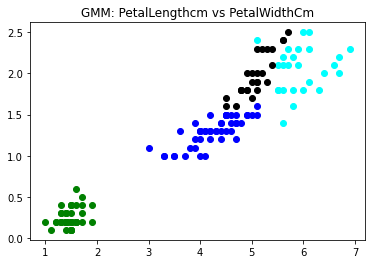

In [4]:
data_petal=iris[['PetalLengthCm','PetalWidthCm']]

# training gaussian mixture model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data_petal)

# prediction from gmm
labels = gmm.predict(data_petal)
frame= pd.DataFrame(data_petal)
frame['cluster']=labels
frame.columns=['PetalLengthCm','PetalWidthCm','cluster']

color=['blue','green','cyan','black']
for k in range(0,4):
    data=frame[frame['cluster']==k]
    plt.scatter(data["PetalLengthCm"],data["PetalWidthCm"],c=color[k])
plt.title('GMM: PetalLengthcm vs PetalWidthCm')
plt.show()

## GMM: Sepal Length vs Sepal Width

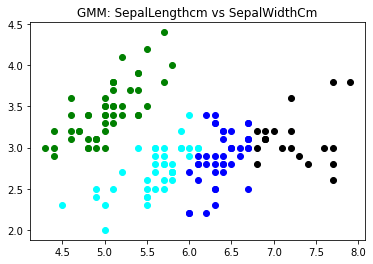

In [5]:
data_sepal=iris[['SepalLengthCm','SepalWidthCm']]

# training gaussian mixture model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data_sepal)

# prediction from gmm
labels = gmm.predict(data_sepal)
frame= pd.DataFrame(data_sepal)
frame['cluster']=labels
frame.columns=['SepalLengthCm','SepalWidthCm','cluster']

color=['blue','green','cyan','black']
for k in range(0,4):
    data=frame[frame['cluster']==k]
    plt.scatter(data["SepalLengthCm"],data["SepalWidthCm"],c=color[k])
plt.title('GMM: SepalLengthcm vs SepalWidthCm')
plt.show()

# GMM-EM

In [6]:
from sklearn import datasets

iris = datasets.load_iris()

In [7]:
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

## GMM-EM: Petal Length vs Petal Width

In [8]:
#Contoh Pendekatan GMM dengan EM
# Contoh Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
data_petal = iris.data[:,2:4]

#training gaussian mixture model
from sklearn.mixture import GaussianMixture
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['full'])
for (name,estimator) in estimators.items():
    estimator.fit(data_petal) ## fits mixture model menggunakan EM

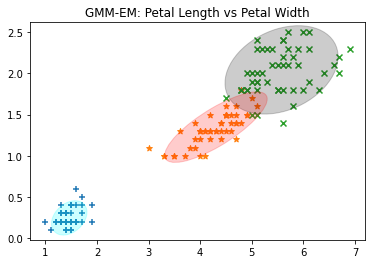

In [9]:
import numpy as np
from matplotlib import pyplot as plt


colors=['cyan','black','red']
markers=['+','*','x']

#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title("GMM-EM: Petal Length vs Petal Width")
    plt.show()

## GMM-EM: Sepal Length vs Sepal Width

In [10]:
#Contoh Pendekatan GMM dengan EM
# Contoh Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
data_sepal = iris.data[:,0:2]

#training gaussian mixture model
from sklearn.mixture import GaussianMixture
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['full'])
for (name,estimator) in estimators.items():
    estimator.fit(data_sepal) ## fits mixture model menggunakan EM

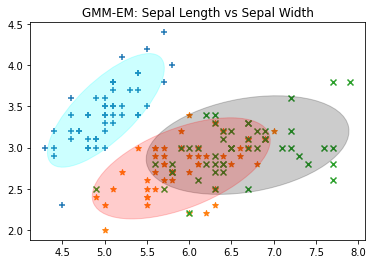

In [11]:
import numpy as np
from matplotlib import pyplot as plt


colors=['cyan','black','red']
markers=['+','*','x']

#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title("GMM-EM: Sepal Length vs Sepal Width")
    plt.show()

# B. Analisalah hasil perbandingan dari K-Means Clustering dan GMM Clustering

(-0.5, 372.5, 263.5, -0.5)

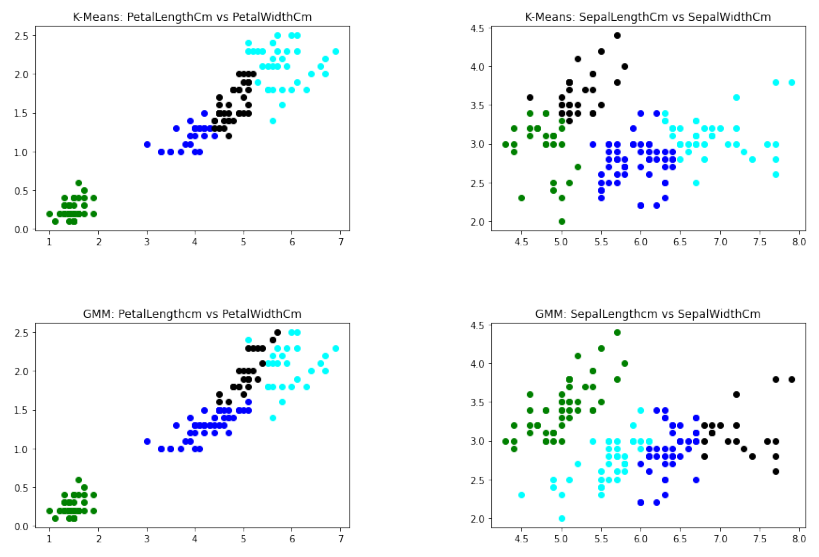

In [26]:
import imageio as iio
 
# read an image
img1 = iio.imread('/content/K-Means_Petal.png')
img2 = iio.imread('/content/K-Means_Sepal.png')
img3 = iio.imread('/content/GMM_Petal.png')
img4 = iio.imread('/content/GMM_Sepal.png')

# Output Images
fig = plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(img2)
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(img3)
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(img4)
plt.axis("off")

Pada clustering K-Means dan GMM didapatkan distribusi data yang sama. Namun, dapat diperhatikan bahwa terdapat warna pada titik titik yang ada di grafik clustering K-Means dan GMM yang berbeda sehingga menandakan ada titik data yang masuk pada clustering yang berbeda antara clustering k-means dan GMM. Dapat juga dilihat pada grafik GMM untuk petal, terdapat satu titik data yang masuk clustering warna biru tetapi berada pada daerah clustering hitam sehingga ini menandakan bahwa model K-Means lebih baik untuk memprediksi daripada model GMM.